# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
with open(r'\Users\pmaxl\Resources\api_keys.py') as apikey:
    mykey=apikey.read()
    mykey=mykey.split('"')
     
api_key = mykey[3]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [126]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [127]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"  
weather_json = []
ind=-1
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city
        response = requests.get(query_url)
        response_json = response.json()
        weather_json.append(response_json)
        ind=ind+1
        print(f'#{ind} {city} data appended to list!')
    except:
        print(f'{city} not found...')
    

#0 hobart data appended to list!
#1 busselton data appended to list!
#2 lata data appended to list!
#3 camopi data appended to list!
#4 buala data appended to list!
#5 geraldton data appended to list!
#6 hilo data appended to list!
#7 albany data appended to list!
#8 lorengau data appended to list!
#9 tias data appended to list!
#10 thompson data appended to list!
#11 bambous virieux data appended to list!
#12 chuy data appended to list!
#13 faya data appended to list!
#14 pevek data appended to list!
#15 butaritari data appended to list!
#16 yellowknife data appended to list!
#17 rikitea data appended to list!
#18 pangkalanbuun data appended to list!
#19 sorland data appended to list!
#20 husavik data appended to list!
#21 beringovskiy data appended to list!
#22 qaanaaq data appended to list!
#23 bridgetown data appended to list!
#24 punta arenas data appended to list!
#25 lebu data appended to list!
#26 mokhsogollokh data appended to list!
#27 tasbuget data appended to list!
#28 grea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [148]:
data = {'City': [],
        'Country': [],
        'Lat': [],
        'Lng': [],
        'Max Temp': [],
        'Humidity': [],
        'Cloudiness': [],
        'Wind Speed': [],
        'Country': [],
        'Date': [],
       }
na_cities=[]

for x in range(len(weather_json)):
    
    
    try:

        data['City'].append(weather_json[x]['name'])

        data['Country'].append(weather_json[x]['sys']['country'])
    
        data['Lat'].append(weather_json[x]['coord']['lat'])

        data['Lng'].append(weather_json[x]['coord']['lon'])

        data['Max Temp'].append(weather_json[x]['main']['temp_max'])

        data['Humidity'].append(weather_json[x]['main']['humidity'])

        data['Cloudiness'].append(weather_json[x]['clouds']['all'])

        data['Wind Speed'].append(weather_json[x]['wind']['speed'])

        data['Date'].append(weather_json[x]['dt'])
        
    except:
        na_cities.append(x)


print(f'Insufficient data for {len(na_cities)} cities')

data['Country']

    
weather_df = pd.DataFrame(data)
weather_df =weather_df[weather_df["City"] != 'nan']
weather_df.reset_index(drop=True)

weather_df.to_csv(r'\Users\pmaxl\Resources\weather_data.csv', index = False)
weather_df.head(15)


Insufficient data for 44 cities


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Hobart,AU,-42.88,147.33,297.15,38,0,10.30,1605149492
1,Busselton,AU,-33.65,115.33,290.37,70,94,2.68,1605149706
2,Lata,PT,40.16,-8.33,289.26,91,98,1.13,1605149706
3,Camopi,GF,3.17,-52.32,295.99,96,30,1.05,1605149706
4,Buala,SB,-8.14,159.59,302.78,71,61,2.86,1605149706
5,Geraldton,AU,-28.77,114.60,296.15,40,0,2.60,1605149707
6,Hilo,US,19.73,-155.09,300.15,69,75,2.60,1605149693
7,Albany,US,42.60,-73.97,290.93,90,100,2.28,1605149603
8,Lorengau,PG,-2.02,147.27,303.44,61,97,2.57,1605149707
9,Tías,ES,28.96,-13.64,293.15,82,0,2.60,1605149707


In [149]:
wdf=pd.read_csv('\\Users\\pmaxl\\Resources\\weather_data.csv')
wdf_summary=wdf.describe()
wdf_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.653212,19.021250,286.748802,75.770833,51.189236,3.425538,1.605150e+09
std,33.298662,91.159498,13.249322,18.700744,40.208681,2.490613,8.175530e+01
min,-54.800000,-179.170000,244.350000,8.000000,0.000000,0.100000,1.605149e+09
25%,-7.120000,-62.160000,278.710000,67.000000,4.750000,1.500000,1.605150e+09
50%,24.390000,21.250000,289.705000,81.000000,53.000000,2.785000,1.605150e+09
75%,48.700000,101.680000,297.160000,90.000000,90.000000,4.642500,1.605150e+09
max,78.220000,179.320000,313.150000,100.000000,100.000000,19.900000,1.605150e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [58]:
#  Get the indices of cities that have humidity over 100%.


In [59]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

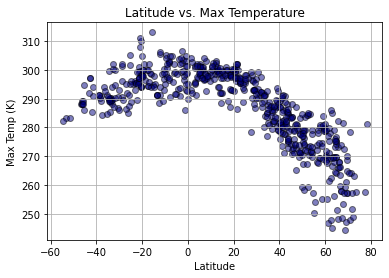

In [150]:
x1=wdf['Lat']
y1=wdf['Max Temp']
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
plt.title("Latitude vs. Max Temperature")
plt.show()

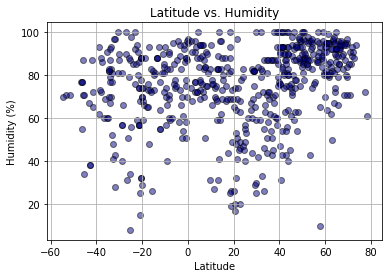

In [151]:
x1=wdf['Lat']
y1=wdf['Humidity']
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

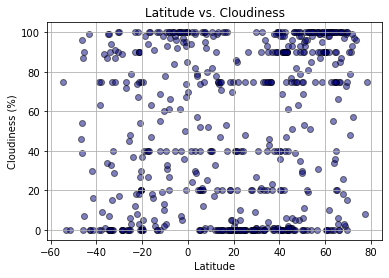

In [152]:
x1=wdf['Lat']
y1=wdf['Cloudiness']
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

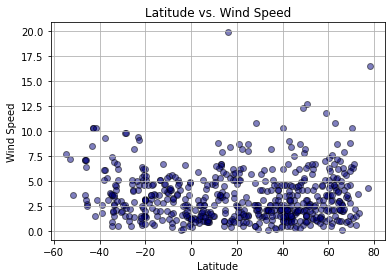

In [153]:
x1=wdf['Lat']
y1=wdf['Wind Speed']
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r= -0.8657547997488999
y= -0.59x + 306.01


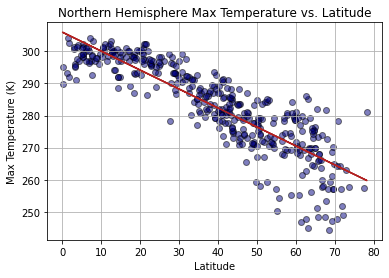

In [154]:
nh_weather=wdf[wdf['Lat']>0]

x=nh_weather['Lat']
y=nh_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Max Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r= 0.5555559175963817
y= 0.25x + 300.81


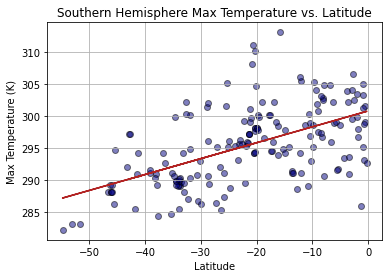

In [155]:
sh_weather=wdf[wdf['Lat']<0]

x=sh_weather['Lat']
y=sh_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Max Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r= 0.2983071396309273
y= 0.28x + 66.59


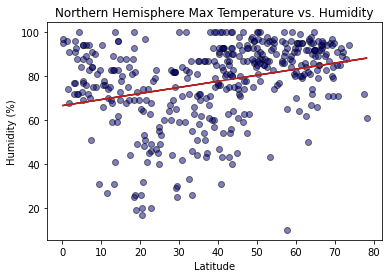

In [156]:
x=nh_weather['Lat']
y=nh_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Max Temperature vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r= 0.1109681733335123
y= 0.15x + 75.32


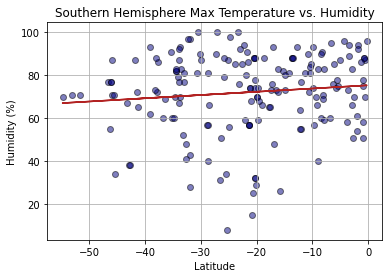

In [157]:
x=sh_weather['Lat']
y=sh_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Max Temperature vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r= 0.26679147388476687
y= 0.54x + 31.19


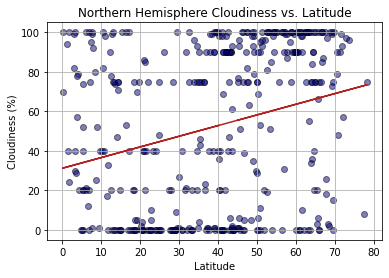

In [158]:
x=nh_weather['Lat']
y=nh_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r= 0.2872373009625259
y= 0.83x + 66.62


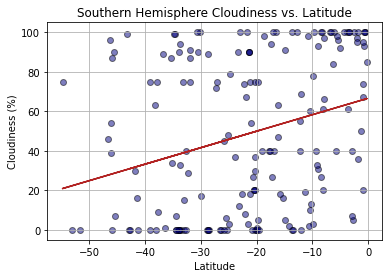

In [159]:
x=sh_weather['Lat']
y=sh_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r= 0.12292651553447882
y= 0.02x + 2.71


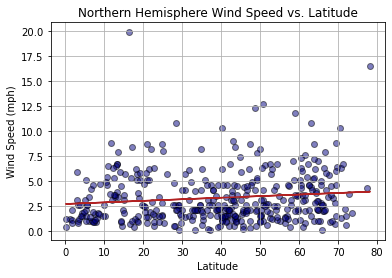

In [160]:
x=nh_weather['Lat']
y=nh_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r= -0.33403678258636565
y= -0.06x + 2.45


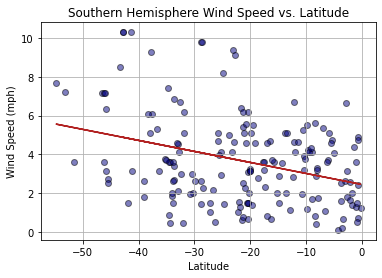

In [161]:
x=sh_weather['Lat']
y=sh_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()